In [3]:
import numpy as np
import scipy.ndimage
import copy
import random

from math import sqrt
import sys
#import scipy
from scipy import signal

from pyprop import rw
from pyprop import propagator as pb
from pyprop import models
from math import sqrt

import matplotlib.pyplot as plt


In [14]:
energy = 30. #in keV
px_size = 1e-6 #in m
#nn = int(i)/10.
thickness = 0.1e-3
distance = 0.5 #in m
source_distance = 37. #in m
source_size_V, source_size_H = 8.5e-6, 140e-6 #in um - SIGMAS
counts_on_pixel = 50000
delta = 6.70778e-07 #PMMA
beta  = 3.39441e-10 #PMMA
field_size = 400
sphere_radius = 20.

print(delta,beta)
#SPHERE EXAMPLE - (energy,size,R,pixelsize,delta,beta)
fields1, _, _ = models.testSphere(energy, field_size, sphere_radius, px_size, delta, beta)

#DO PADDING
oxps, oyps = fields1.shape
fields1 = np.pad(fields1,[oyps,oxps],'edge')	
#Polychromatic beam
numberofevents = 20 #number of energies to sum
MD = 1e-2	     #energy bandwidth

pro = pb.propagators(px_size,energy,distance,1)
pro.preparefresnel2D(fields1)
pro.SRsource([source_size_V, source_size_H],source_distance) #prepare the SR source 20 x 100 um

#to save data
#rw.write_tif("OriginalField.tif",np.real(fields1[oyps:-oyps,oxps:-oxps]))


fieldIntensity = pro.polybeamMC(fields1,numberofevents,MD)            #POLYCHROMATICITY
fieldIntensity = pro.AddDetectorBlurring(1.4,fieldIntensity)          #DETECTOR BLURRRING - SIGMA
fieldIntensity = pro.AddDetectorNoise(counts_on_pixel,fieldIntensity) #POISSON NOISE
name = "Out" + str('%4.4f' % 2.3) + "m.tif"
fieldIntensity = fieldIntensity[oyps:-oyps,oxps:-oxps]

6.70778e-07 3.39441e-10
Summing up: 30.261036810182212 0.12251948032827291
Summing up: 29.94484295516265 0.9105221494677066
Summing up: 29.981644288020657 0.9896723986364364
Summing up: 30.05940435408195 0.8969733565445507
Summing up: 29.99608356807099 0.9995275151758064
Summing up: 30.157516616127918 0.46557929764430855
Summing up: 30.03897430855381 0.9542761462780016
Summing up: 29.850790652431137 0.5036044758413647
Summing up: 30.001781923537006 0.9999021713180128
Summing up: 30.032692735484176 0.9676048143175231
Summing up: 30.296305984516007 0.06686078869270062
Summing up: 30.131003116534576 0.5893252621916151
Summing up: 29.924600584971103 0.8393192200267363
Summing up: 30.142432350658723 0.5352255439224951
Summing up: 29.926064181226938 0.8449905278337387
Summing up: 30.088669778920657 0.7848613462516348
Summing up: 29.911270241844473 0.7846040790191847
Summing up: 29.912329079987224 0.7891324288617505
Summing up: 29.982981566239598 0.9911159260790665
Summing up: 30.186307183875

AttributeError: 'Figure' object has no attribute 'set_title'

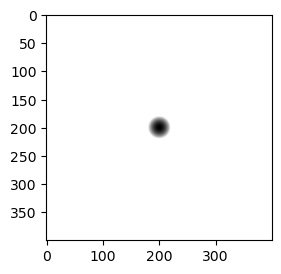

In [17]:
#rw.write_tif(name,fieldIntensity))

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(np.real(fields1[oyps:-oyps,oxps:-oxps]),cmap='gray')
f.add_subplot(1,2,2)
plt.imshow(fieldIntensity,cmap='gray')
plt.show(block=True)        